In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

## Central Limit Theorem

In [3]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [4]:
ckd.select('Age')

Age
48
53
63
68
61
48
69
73
73
46


### Estimating max age

In [6]:
max_ages = make_array()
for _ in np.arange(1000):
    max_age = np.max(ckd.sample().column('Age'))
    max_ages = np.append(max_ages, max_age)

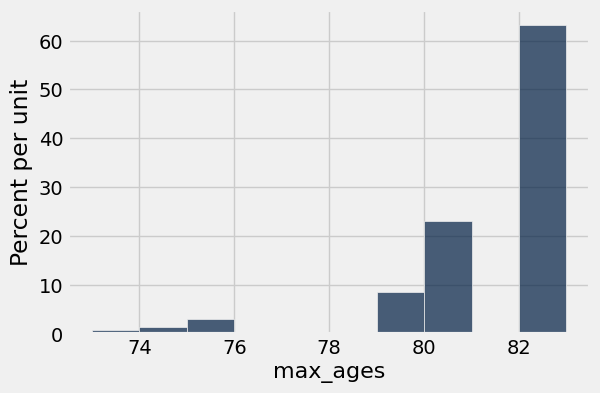

In [7]:
Table().with_column('max_ages', max_ages).hist()

Wait, how come that wasnt a normal distribution?

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

## Estimating mean age

In [8]:
mean_ages = make_array()
for _ in np.arange(1000):
    mean_age = np.mean(ckd.sample().column('Age'))
    mean_ages = np.append(mean_ages, mean_age)

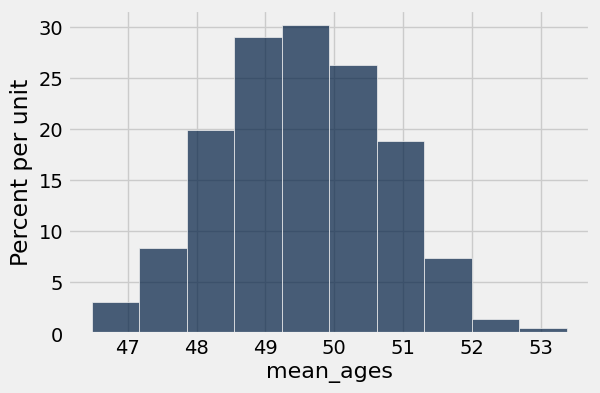

In [9]:
Table().with_column('mean_ages', mean_ages).hist()

# Classification Examples: Medicine



In [10]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


This dataset represents a doctor's patients

**Question:** How many patients?

In [12]:
ckd.num_rows

158

These patients are classified by whether they have kidney disease or not?

**Question:** Which column do you think indicates this?

In [13]:
ckd.labels

('Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cell',
 'Pus Cell clumps',
 'Bacteria',
 'Glucose',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Class')

In [16]:
ckd.column('Class')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Question:** Now that we know it is `Class`, how many patients had kidney disease and how many didn't?
    <details>,
<summary>Solution</summary>
  ckd.group('Class')
</details>


In [17]:
sum(ckd.column('Class'))

43

In [18]:
ckd.group('Class')

Class,count
0,115
1,43


**Question:** Can we predict whether a patience has kidney disease based on their Glocuse levels?
    <details>,
<summary>Solution</summary>
  Maybe
</details>


**Question:** What's our method to determine if we can?
       <details>
<summary>Solution</summary>
    <h3>Visualize then quantify</h3>
    
</details>

In [21]:
ckd.column('Glucose')

array([117,  70, 380, 157, 173,  95, 264,  70, 253, 163, 129, 133,  76,
       280, 210, 219, 295, 118, 224, 128, 118, 105, 288, 273, 122, 303,
       102, 107, 117, 239,  94, 129, 252, 255, 253, 214, 490, 163, 241,
       214, 106, 424, 176, 140,  70,  82, 119,  99, 121, 131,  91,  98,
       104, 131, 122, 118, 117, 132,  97, 133, 122, 121, 111,  96, 139,
       125, 123, 112, 140, 130, 123, 100,  94,  81,  93, 124,  89, 125,
        91, 127,  96, 128, 122, 128, 137,  81, 102, 132, 104, 131, 102,
       120, 105, 109, 130, 100, 109, 120,  80, 130,  99, 134,  92, 132,
        88, 100, 130,  95, 111, 106,  97, 108,  99,  83, 109,  86, 102,
        95,  87, 107, 117,  88, 105,  70,  89, 118,  81, 125,  82, 107,
        83,  79, 109, 133, 111,  74,  88,  97,  78, 113,  75, 119, 132,
       113, 100,  93,  94, 112,  99,  85, 133, 117, 137, 140,  75, 100,
       114, 131])

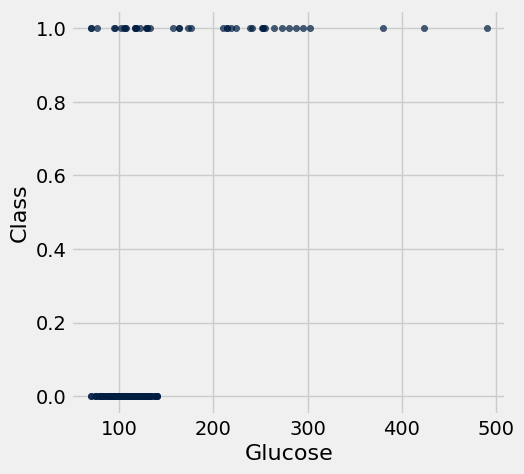

In [24]:
ckd.select('Class', 'Glucose').scatter('Glucose')

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

**Question:** How can we visualzie?

In [ ]:
# skip 

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
ckd.scatter('Glucose', 'Class')

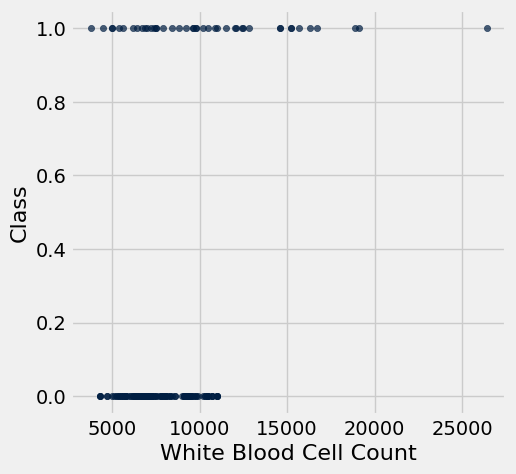

In [25]:
ckd.scatter('White Blood Cell Count', 'Class')

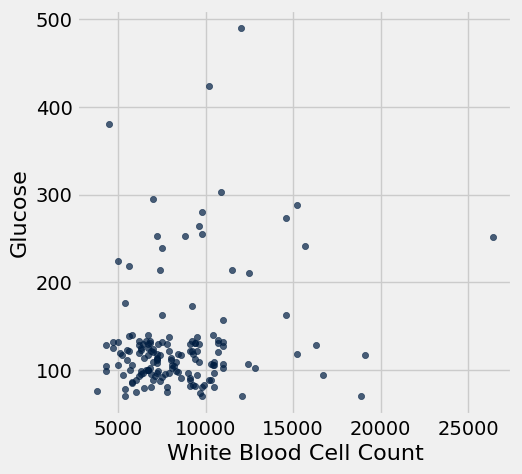

In [26]:
ckd.scatter('White Blood Cell Count', 'Glucose')

But let's color the different patients based on their class

In [ ]:
# skip

In [ ]:
# skip

/opt/tljh/user/lib/python3.12/site-packages/datascience/tables.py:4050: FutureWarning: scatter(colors=x) has been removed. Use scatter(group=x)
  warnings.warn("scatter(colors=x) has been removed. Use scatter(group=x)", FutureWarning)


AttributeError: PathCollection.set() got an unexpected keyword argument 'colors'

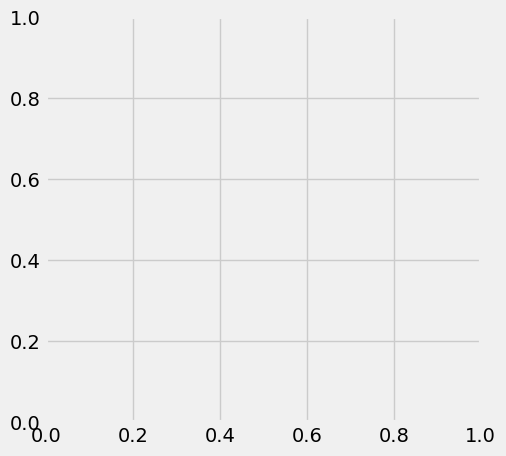

In [27]:
ckd.scatter('White Blood Cell Count', 'Glucose', colors='Class')

Let's fix this error by reading the documentation:

In [29]:
help(ckd.scatter)

Help on method scatter in module datascience.tables:

scatter(column_for_x, select=None, overlay=True, fit_line=False, group=None, labels=None, sizes=None, width=None, height=None, s=20, **vargs) method of datascience.tables.Table instance
    Creates scatterplots, optionally adding a line of best fit. Redirects to ``Table#iscatter``
    if interactive plots are enabled with ``Table#interactive_plots``

    args:
        ``column_for_x`` (``str``): the column to use for the x-axis values
            and label of the scatter plots.

    kwargs:
        ``overlay`` (``bool``): if true, creates a chart with one color
            per data column; if false, each plot will be displayed separately.

        ``fit_line`` (``bool``): draw a line of best fit for each set of points.

        ``vargs``: additional arguments that get passed into `plt.scatter`.
            see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
            for additional arguments that can be passed 

In [30]:
# fix is below

In [31]:
# fix is below

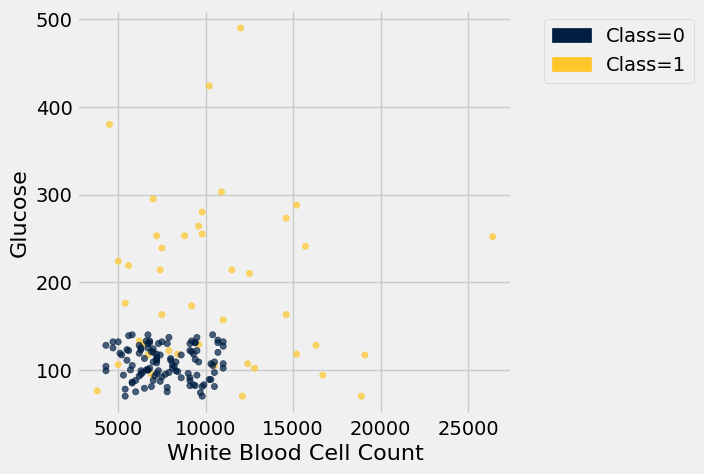

In [32]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Class')

Let's talk about this visualization. How would we classify whether a patience had kidney disease based on their gluclose levels and white blood cell count?

What ideas does the class have?

(skip)

**Question:** What about predicting kidney disease based on Hemoglobin and Glucose?

In [ ]:
# make the visualization here

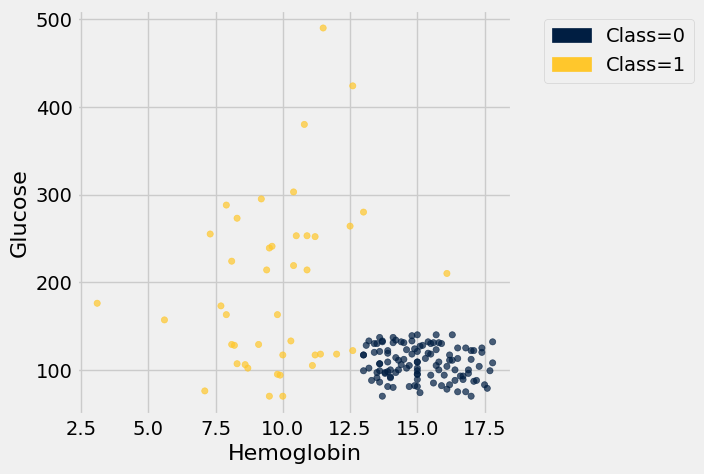

In [33]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

# Classification Examples: Counterfeit Banknotes

let's look at another example

In [34]:
banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


**Question:** Which column here indicates for us whether the bill is counterfeit or not?

**Question:** What are the possible values for this column? Is it binary (yes or no), or maybe trinary (yes or no or maybe)?


In [35]:
banknotes.group('Class')

Class,count
0,762
1,610


**Question:** What columns should we use to predict whether a bill was counterfeit or not?

In [ ]:
banknotes.labels

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
#skip

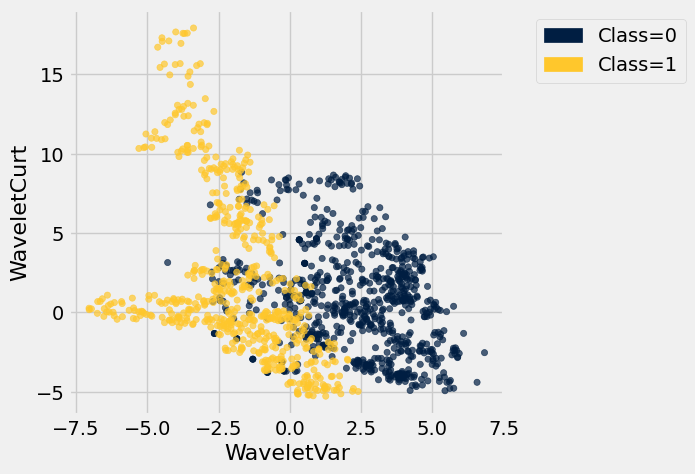

In [36]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')

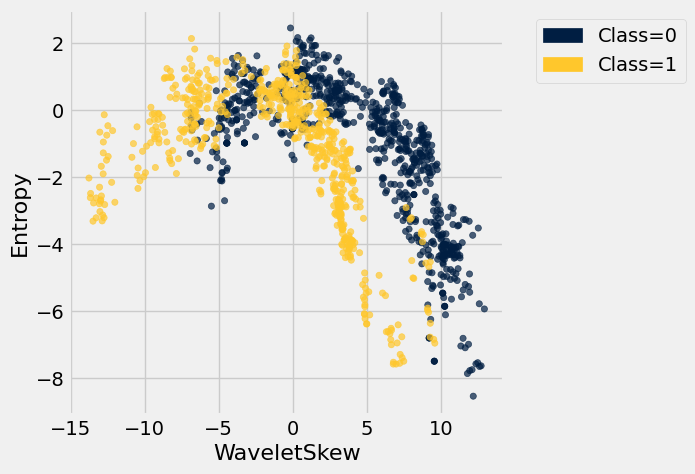

In [37]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Class')

**Question:** Which of these are better?

**Question:** What if we try making the prediction based on all of the features?


In [42]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
           cmap='viridis',
           s=50);
plots.show()

<Figure size 800x800 with 0 Axes>

(back to slides "Classifier")

# Defining a Classifier

In [43]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients.show(5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0


In [44]:
patients.group('Class')

Class,count
0,444
1,239


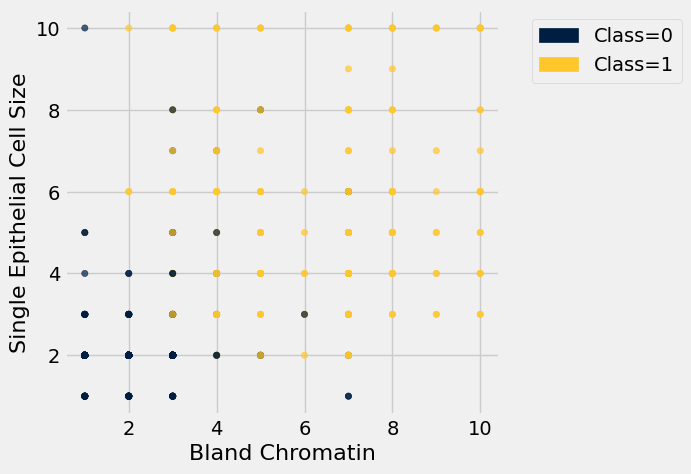

In [45]:

patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Class')

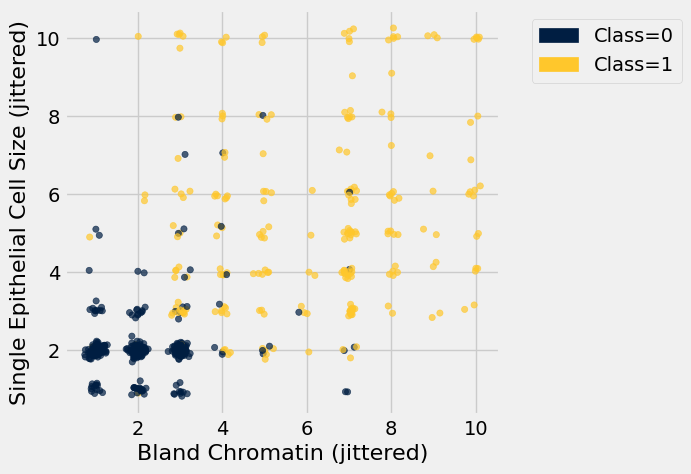

In [46]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

jittered.scatter('Bland Chromatin (jittered)', 'Single Epithelial Cell Size (jittered)', group='Class')

# Distance

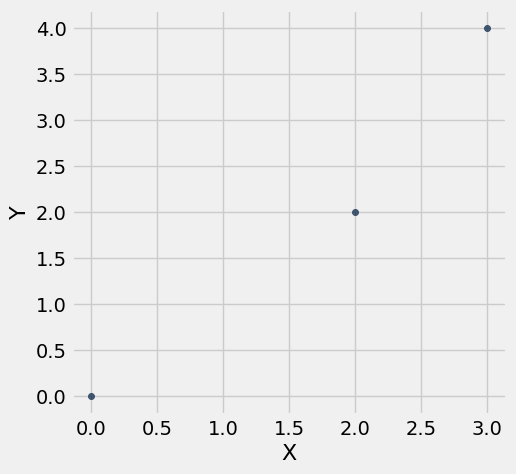

In [47]:
Table().with_columns(['X', [0, 2, 3], 'Y', [0, 2, 4]]).scatter('X', 'Y')

In [48]:
def distance(pt1, pt2):
    """Return the distance between two points (represented as arrays)"""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(make_array(row1), make_array(row2))

In [49]:
attributes = patients.drop('Class')
attributes.show(3)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
5,1,1,1,2,1,3,1,1
5,4,4,5,7,10,3,2,1
3,1,1,1,2,2,3,1,1


In [50]:
0 + 9 + 9 + 16 + 25 + 81 + 0 + 1 + 0

141

In [51]:
np.sqrt(141)

11.874342087037917

In [52]:
row_distance(attributes.row(0), attributes.row(1))

11.874342087037917

In [53]:
row_distance(attributes.row(0), attributes.row(2))

2.2360679774997898

In [54]:
row_distance(attributes.row(0), attributes.row(0))

0.0

# Classification Procedure

In [56]:
def distances(training, example):
    """Compute a table with the training set and distances to the example for each row in the training set."""
    dists = [] # this is making an array (techinically its a list)
    attributes = training.drop('Class')
    for row in attributes.rows:
        dist = row_distance(row, example)
        dists.append(dist)
    return training.with_column('Distance', dists)

In [62]:
def closest(training, example, k=1):
    """Return a table of the k closest neighbors to example"""
    return distances(training, example).sort('Distance').take(np.arange(k))

In [63]:
patients.take(12)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,3,3,3,2,3,4,4,1,1


In [64]:
example = patients.drop('Class').row(12)
example

Row(Clump Thickness=5, Uniformity of Cell Size=3, Uniformity of Cell Shape=3, Marginal Adhesion=3, Single Epithelial Cell Size=2, Bare Nuclei=3, Bland Chromatin=4, Normal Nucleoli=4, Mitoses=1)

In [65]:
closest(patients, example,k=1)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
5,3,3,3,2,3,4,4,1,1,0


In [66]:

closest(patients.exclude(12), example, 1)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Distance
5,3,3,4,2,4,3,4,1,1,1.73205


In [67]:
def majority_class(neighbors):
    """Return the class that's most common among all these neighbors."""
    return neighbors.group('Class').sort('count', descending=True).column('Class').item(0)

In [68]:
def classify(training, example, k):
    "Return the majority class among the k nearest neighbors."
    nearest_neighbors = closest(training, example, k)
    return majority_class(nearest_neighbors)

In [69]:
classify(patients.exclude(12), example, 5)

0

(back to slides)

# Evaluation